In [90]:
import numpy as np
import pandas as pd
import time, json, requests
from datetime import datetime
import matplotlib
import matplotlib.figure
import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [91]:
shape = "./ne_10m_admin_0_countries.shp"
map_df = gpd.read_file(shape)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [92]:
map_df = map_df[['SOVEREIGNT','ADMIN','geometry']]
map_df.head()

,SOVEREIGNT,ADMIN,geometry
0,Indonesia,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [93]:
#map_df[map_df['SOVEREIGNT'].str.match('China')]

In [94]:
#map_df[map_df['SOVEREIGNT'].str.match('Taiwan')]

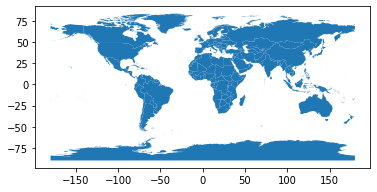

In [95]:
map_df.plot()

In [96]:
# load in new csv file
df = pd.read_excel("countries1.xlsx", header=0)

df.head()

,Admin,Confirmed
0,China,16678
1,Thailand,25
2,Singapore,24
3,Japan,22
4,Hong Kong S.A.R,21


In [97]:
# join the geodataframe with the cleaned up csv dataframe
combined =map_df.append(df, sort=True)

combined.head()

,ADMIN,Admin,Confirmed,SOVEREIGNT,geometry
0,Indonesia,NaN,NaN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,NaN,NaN,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,NaN,NaN,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,NaN,NaN,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,NaN,NaN,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [98]:
# join the geodataframe with the cleaned up csv dataframe
combined = map_df.set_index('ADMIN').join(df.set_index('Admin'))

combined.head(300)

,SOVEREIGNT,geometry,Confirmed
ADMIN,,,
Indonesia,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",NaN
Malaysia,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",10.0
Chile,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",NaN
Bolivia,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",NaN
Peru,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",NaN
Argentina,Argentina,"MULTIPOLYGON (((-67.28475 -23.83414, -67.25133...",NaN
Dhekelia Sovereign Base Area,United Kingdom,"POLYGON ((33.78094 34.97635, 33.76043 34.97968...",NaN
Cyprus,Cyprus,"MULTIPOLYGON (((33.78183 34.97622, 33.78094 34...",NaN
India,India,"MULTIPOLYGON (((77.80035 35.49541, 77.81533 35...",3.0


In [102]:
combined['Confirmed'].fillna(0, inplace=True) 


ADMIN
Indonesia                        0
Malaysia                        10
Chile                            0
Bolivia                          0
Peru                             0
                                ..
Macao S.A.R                     10
Ashmore and Cartier Islands      0
Bajo Nuevo Bank (Petrel Is.)     0
Serranilla Bank                  0
Scarborough Reef                 0
Name: Confirmed, Length: 255, dtype: int64

In [103]:
combined.isnull().sum()

SOVEREIGNT    0
geometry      0
Confirmed     0
dtype: int64

In [114]:
combined[combined['SOVEREIGNT'].str.match('China')]
combined['Confirmed']=combined['Confirmed'].astype(int)

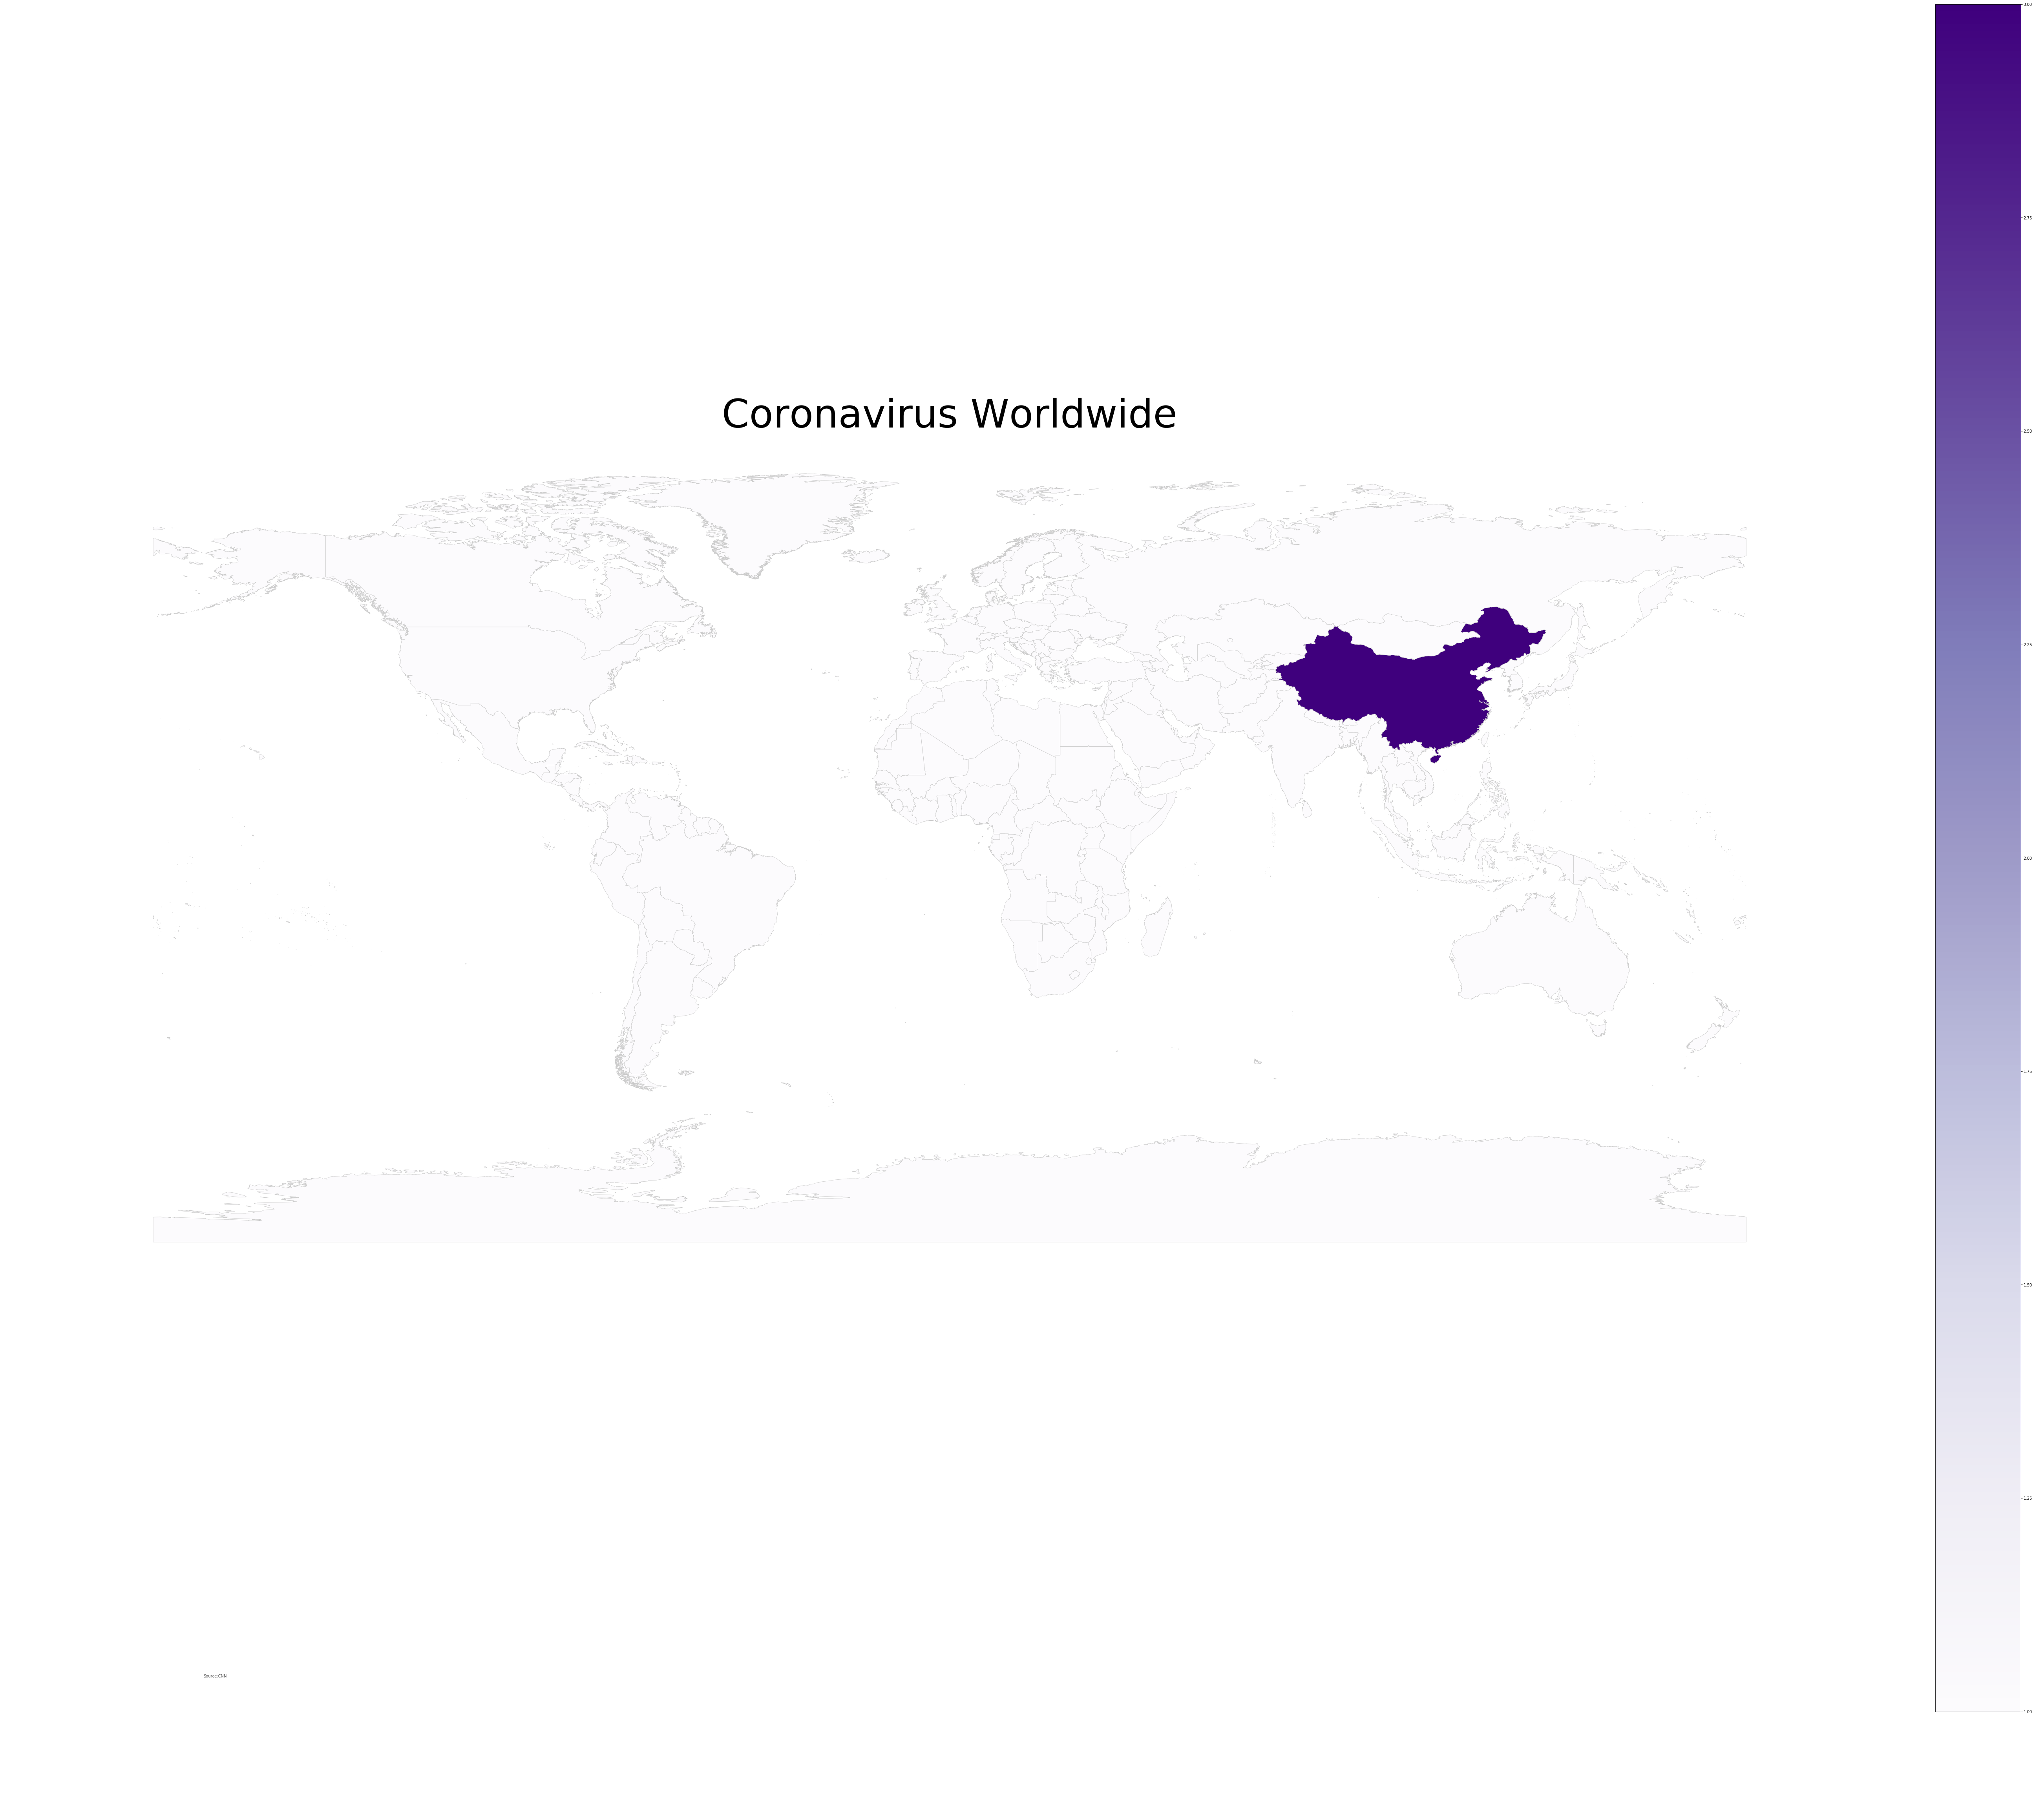

In [116]:
# set a variable that will call whatever column we want to visualise on the map

variable = 'Confirmed'

# set the range for the choropleth
vmin, vmax =1,3

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(100, 80))

# create map
combined.plot(column=variable, cmap='Purples',  linewidth=0.8, ax=ax, edgecolor='0.8')

# customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title(' Coronavirus Worldwide ', \
              
              fontdict={'fontsize': '100',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source:CNN',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')


# Add Labels
#df1['coords'] = combined['geometry'].apply(lambda x: x.representative_point().coords[:])
#df1['coords'] = [coords[0] for coords in df1['coords']]
#for idx, row in df1.iterrows():
  #  ax.annotate(s=row['ADMIN'], xy=row['coords'],horizontalalignment='center')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Purples', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png, can also save as svg
fig.savefig('testmap4.png', dpi=300)
